# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = [x for x in ALL_FX if x not in ["USDMYR", "USDCNH"]]
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
                   asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=130, rebalance_period="daily",
                   sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=130,
                   portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=260)

# Other Data

In [23]:
reer_cpi = read_prices("../../Dymon/Code Data/REER_CPI.csv")

In [24]:
reer_cpi.columns = [x[0] for x in reer_cpi.columns]

In [25]:
all_reer_cpi = reer_cpi[[("JBDC"+x+" Index") for x in [x[3:] for x in universe]]]
all_reer_cpi.columns = universe

In [26]:
all_reer_cpi_cleaned = all_reer_cpi.pipe(fill_date, True).pipe(omit_trailing_na)

# Data Integrity

<AxesSubplot:>

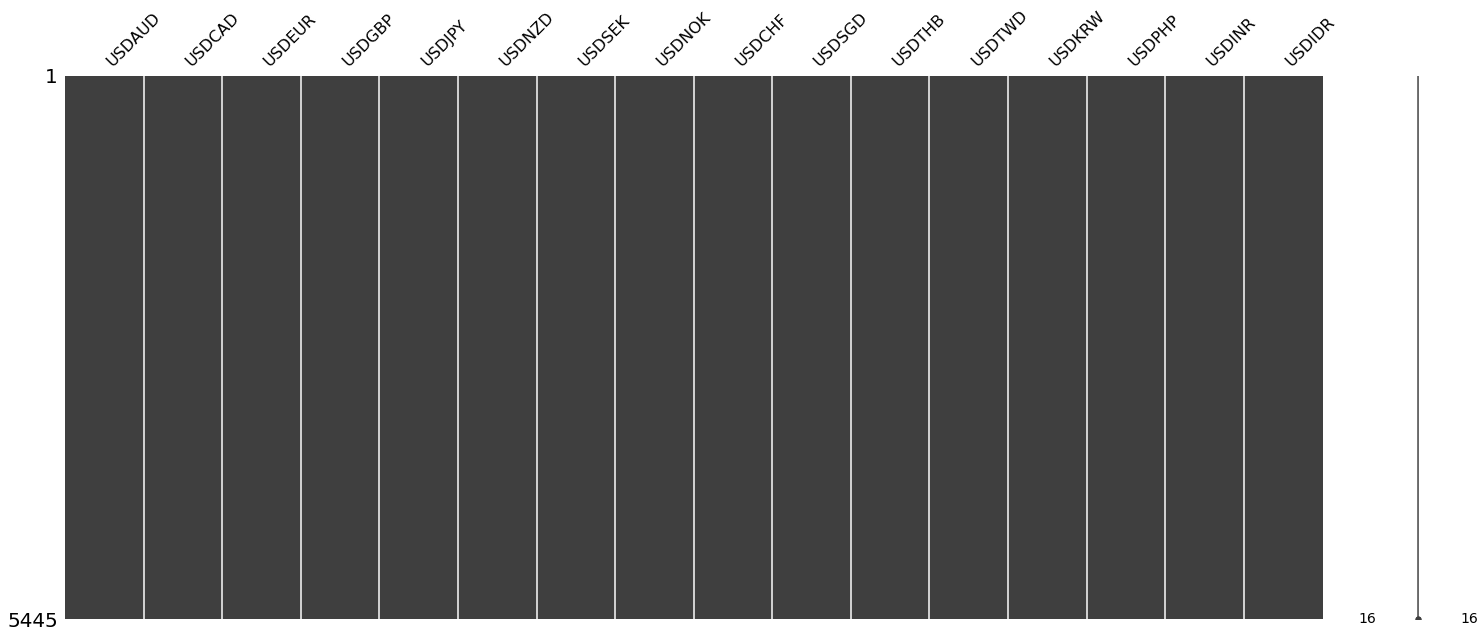

In [27]:
msmx(all_reer_cpi)

# Signal 

In [28]:
mag = all_reer_cpi_cleaned.pipe(demean_pct, 252*5)
sig = mag.pipe(omit_leading_na,"any").pipe(high_minus_low) * -1

# Backtest Daily Rebal

In [29]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [30]:
get_summary(daily_bt)

Returns   : -0.011167391879159322
Vol       : 0.10262255177534611
SR        : -0.10882005646873964
Max DD    : -51.32

C Returns : -0.01629271863996564
C SR      : -0.19333839268515648
C Max DD  : -42.72

Hit rate  : 0.495
W | N | L : 0.5 | 0.0 | 0.5
W/L Ratio : 0.98


In [21]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR
annualized_return,0.586584,-1.166591,0.533519,0.436119,-2.574569,0.817078,0.186598,-0.424627,-0.027618,0.366757,-1.109252,0.373975,0.319833,0.141941,0.303412,-0.280824
sharpe,0.17986,-0.425036,0.351118,0.168347,-0.515706,0.346738,0.169907,-0.235113,-0.008841,0.21038,-0.548389,0.354301,0.09238,0.05339,0.132432,-0.131632
dollar_sharpe,0.164395,-0.442765,0.347703,0.164169,-0.551172,0.335219,0.158185,-0.2477,-0.027035,0.20633,-0.574693,0.353009,0.080907,0.042584,0.124668,-0.142512
trade_sharpe,-0.141251,-0.709463,0.546497,0.175462,-0.653281,0.184651,0.168348,-0.607617,-0.116979,0.170965,-1.20477,0.500021,0.068563,0.045501,0.022363,-0.164508
long_sharpe,-0.145422,-0.678932,0.042476,1.393028,0.041932,0.285877,2.213163,NaN,-0.307042,0.29059,-1.269439,2.193664,0.123817,0.062739,-0.023255,-0.544804
short_sharpe,-0.133245,-0.734917,0.566335,-0.289393,-0.806293,-0.213311,0.15227,-0.607617,0.85891,-2.366609,6.132712,0.428269,0.027454,-1.891232,0.449868,0.533663
sortino,0.115187,-0.221485,0.154325,0.0957,-0.281963,0.16905,0.059059,-0.084983,-0.003443,0.092617,-0.153568,0.203152,0.053324,0.031251,0.065887,-0.063685
max_drawdown,-8.119982,-21.459138,-3.800781,-11.047735,-43.365507,-4.478137,-3.64451,-10.708049,-22.737308,-5.172231,-20.772532,-2.052357,-16.16199,-11.926062,-9.469624,-6.649975
max_drawdown_start,2010-09-07,2005-05-16,2011-07-26,2008-07-15,2010-06-03,2013-08-30,2014-07-10,2014-06-06,2009-04-21,2009-03-05,2006-04-13,2011-06-01,2005-11-25,2005-05-05,2010-05-25,2005-09-14
max_drawdown_end,2011-07-27,2016-01-19,2012-07-24,2010-05-18,2015-06-05,2014-07-09,2016-12-15,2016-01-06,2011-08-09,2012-12-18,2013-04-19,2011-09-22,2008-10-08,2008-02-27,2011-08-01,2014-06-26


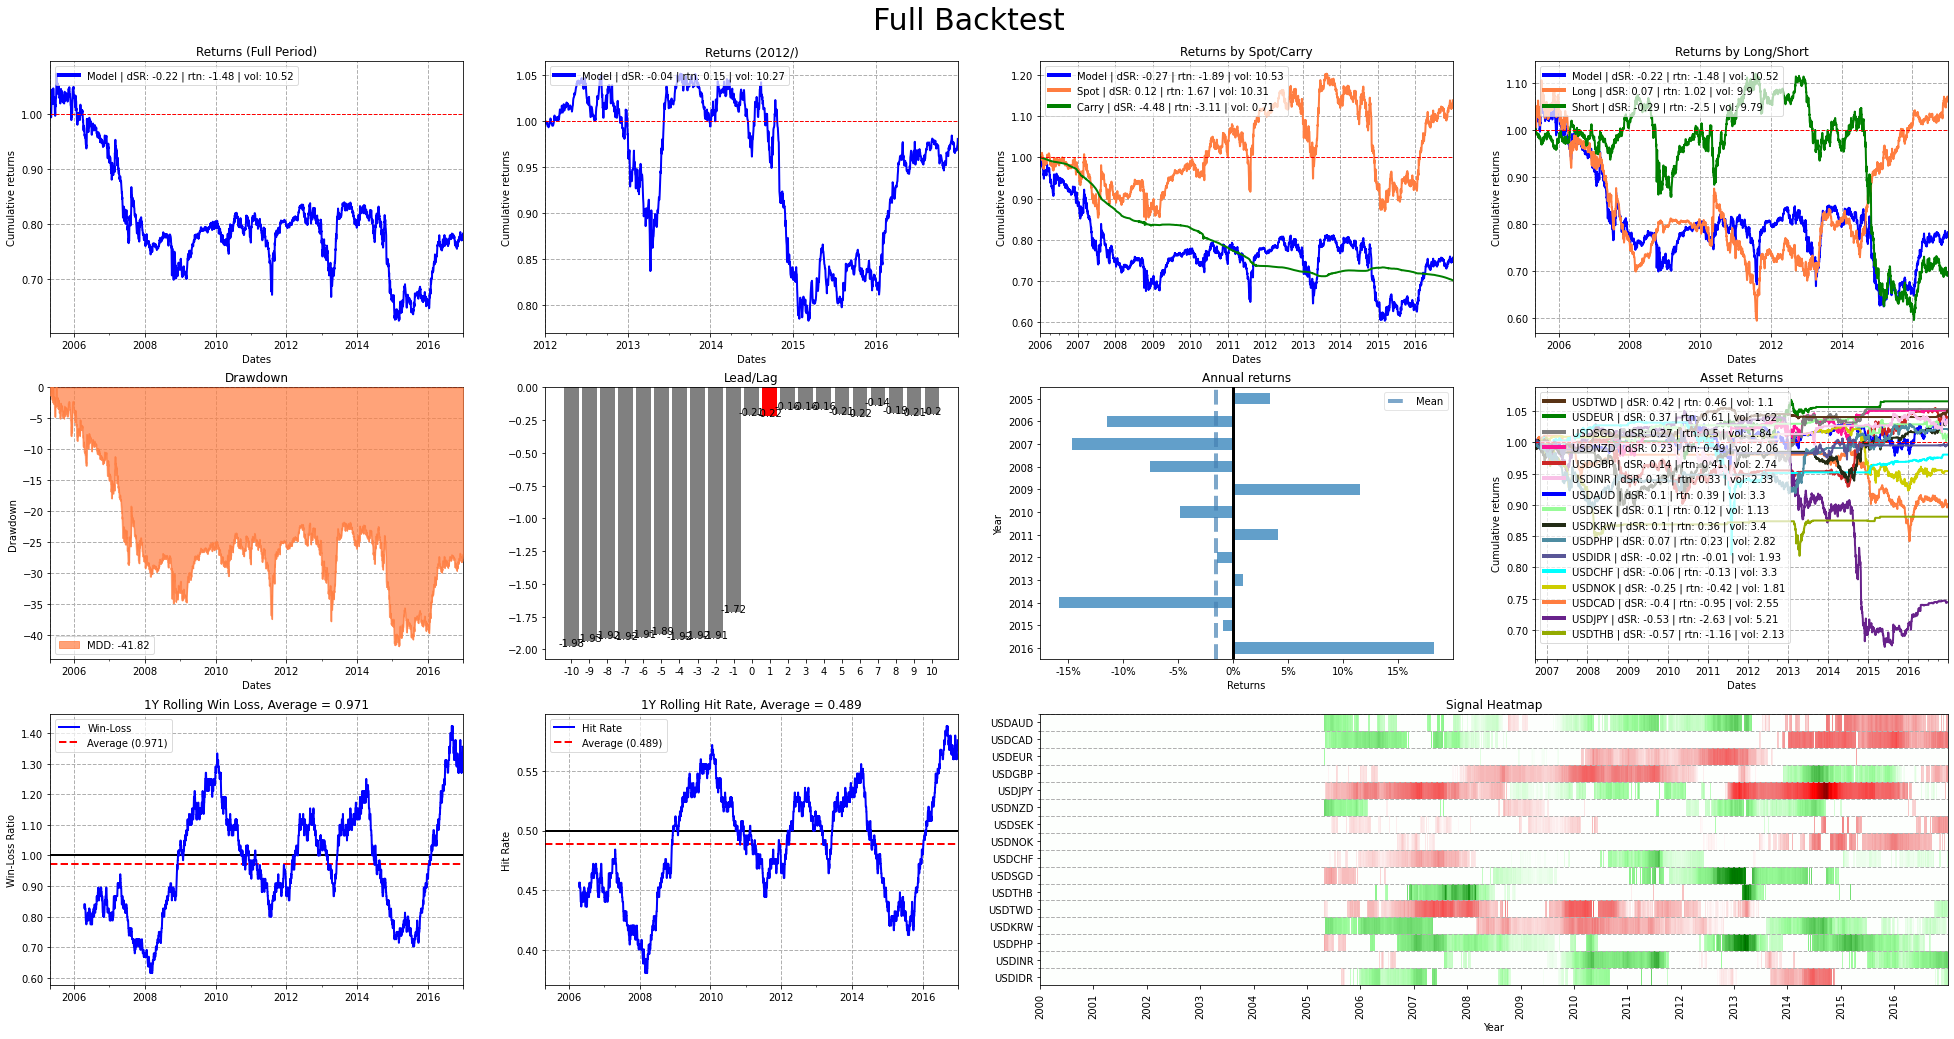

In [22]:
plot_bt(daily_bt)

# Backtest Other Freq

Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


<AxesSubplot:xlabel='Dates', ylabel='Cumulative returns'>

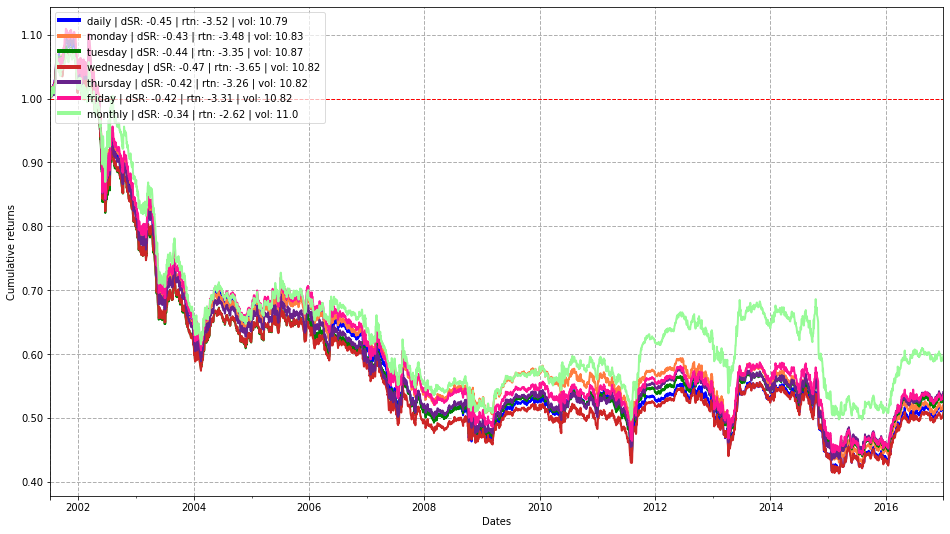

In [17]:
bts = [Backtest(signal = sig, 
               asset_returns = total_returns, 
               tcost = abs(total_returns*0), 
               settings = settings,
               settings_inject = {"rebalance_period":t}) for t in ["monday","tuesday", "wednesday",
                                                                   "thursday", "friday", "monthly"]]
for bt in bts:
  bt.run()
  
gen_plot_rtn(pd.concat([x.model_rtn.rename(x.rebalance_period) for x in [daily_bt]+bts], axis=1))

In [109]:
# pickle.dump(daily_bt, open("../BT/jpm_cpi_xs_all_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/jpm_cpi_xs_all_daily.p", "rb"))

# pickle.dump(bts[-1], open("../BT/jpm_cpi_xs_all_monthly.p", "wb"))
# monthly_bt = pickle.load(open("../BT/jpm_cpi_xs_all_monthly.p", "rb"))

# Regime Plot

In [ ]:
# sig = -1 * sig.pipe(omit_leading_na,"any").pipe(high_minus_low) 


# sig = asia_reer_cpi_cleaned.ffill().pct_change().pipe(zscore, 252*5, 252*3).apply(hold_until_flip) * -1
# sig = sig.pipe(demean_xs).pipe(top_bottom_xs)
# sig[abs(sig) < 0.25] = 0
# sig = CAP(sig, 2.5)